In [2]:
%load_ext autoreload
%autoreload 2
%config Application.log_level="INFO"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from pprint import pprint

import logging
format = "%(asctime)s - %(levelname)s %(message)s"
logging.basicConfig(level=logging.DEBUG, force=True)

import numpy as np
np.set_printoptions(
    suppress=True,
    linewidth=180
)

import matplotlib.pyplot as plt
plt.ion()

pass

In [5]:
from vulnerability import Vulnerability
from vehicles import Vehicle, JsonVehicleProvider
from game import Game
from agents import BasicAttackerAgent, BasicDefenderAgent

In [4]:
log_level = "debug"
game = Game(
    10,
    JsonVehicleProvider("../subgame/python/solutions.json"),
    BasicDefenderAgent(),
    BasicAttackerAgent()
)

dutils = []
autils = []
compromisePctPart = []
compromisePctOverall = []
num_rounds = 100
vcount = []
pcount = []
for i in range(num_rounds):
    dutils.append(game.defender_agent.utility)
    autils.append(game.attacker_agent.utility)
    compromisePctPart.append(len([v for v in game.vehicles if len(v.compromises) > 0])/(len(game.vehicles) if len(game.vehicles) > 0 else 1))
    bot = sum([len(v.achoice) for v in game.vehicles])
    if bot == 0: bot = 1
    compromisePctOverall.append(sum([len(v.compromises) for v in game.vehicles]) / bot)
    vcount.append(len(game.vehicles))
    pcount.append(len([v for v in game.vehicles if v.in_platoon]))
    game.step()

INFO:JsonVehicleProvider:loaded 1000 vehicles
INFO:Game:resetting game
DEBUG:Game:stepping
DEBUG:Game:attacker turn begin
DEBUG:BasicAttackerAgent:attacking vehicle id 586
INFO:BasicAttackerAgent:successfully compromised vehicle 586 vuln 2 sev 5
INFO:BasicAttackerAgent:successfully compromised vehicle 586 vuln 3 sev 2
DEBUG:BasicAttackerAgent:utility 0 (+0)
DEBUG:Game:attacker turn end
INFO:Game:cycling out vehicles
INFO:Game:Vehicle 909 risk 4.05 sev [] has left the game.
INFO:Game:Vehicle 84 risk 19.43 sev [] has left the game.
INFO:Game:Vehicle 532 risk 8.62 has joined the game!
INFO:Game:Vehicle 261 risk 13.3 has joined the game!
DEBUG:Game:stepping
DEBUG:Game:defender turn begin
DEBUG:BasicDefenderAgent:now monitoring vehicle id 112
DEBUG:BasicDefenderAgent:utility 20 (+20)
DEBUG:Game:defender turn end
DEBUG:Game:stepping
DEBUG:Game:attacker turn begin
DEBUG:BasicAttackerAgent:attacking vehicle id 532
INFO:BasicAttackerAgent:successfully compromised vehicle 532 vuln 2 sev 3
INFO:B

In [13]:
print(game.defender_agent.utility)
pprint(game.vehicles)

1869
[Vehicle(risk=7.5, sevs={1: 0, 2: 0.98, 3: 0.26, 4: 0, 5: 0}, in_platoon=True, compromises=set(), known_compromises=set()),
 Vehicle(risk=4.6, sevs={1: 0, 2: 0.54, 3: 0, 4: 0.13, 5: 0}, in_platoon=True, compromises={Action(id=5, acost=5, dcost=5, aprob=0.25, dprob=0.97, sev=2), Action(id=2, acost=1, dcost=3, aprob=0.38, dprob=0.83, sev=2)}, known_compromises={Action(id=5, acost=5, dcost=5, aprob=0.25, dprob=0.97, sev=2)}),
 Vehicle(risk=8.61, sevs={1: 0, 2: 0, 3: 0.45, 4: 0.27, 5: 0}, in_platoon=False, compromises={Action(id=5, acost=5, dcost=4, aprob=0.18, dprob=0.81, sev=4), Action(id=0, acost=2, dcost=4, aprob=0.45, dprob=0.92, sev=3), Action(id=4, acost=3, dcost=3, aprob=0.7, dprob=0.85, sev=4)}, known_compromises={Action(id=5, acost=5, dcost=4, aprob=0.18, dprob=0.81, sev=4), Action(id=0, acost=2, dcost=4, aprob=0.45, dprob=0.92, sev=3), Action(id=4, acost=3, dcost=3, aprob=0.7, dprob=0.85, sev=4)}),
 Vehicle(risk=16.49, sevs={1: 0.22, 2: 0.67, 3: 0, 4: 0.74, 5: 0.07}, in_pla

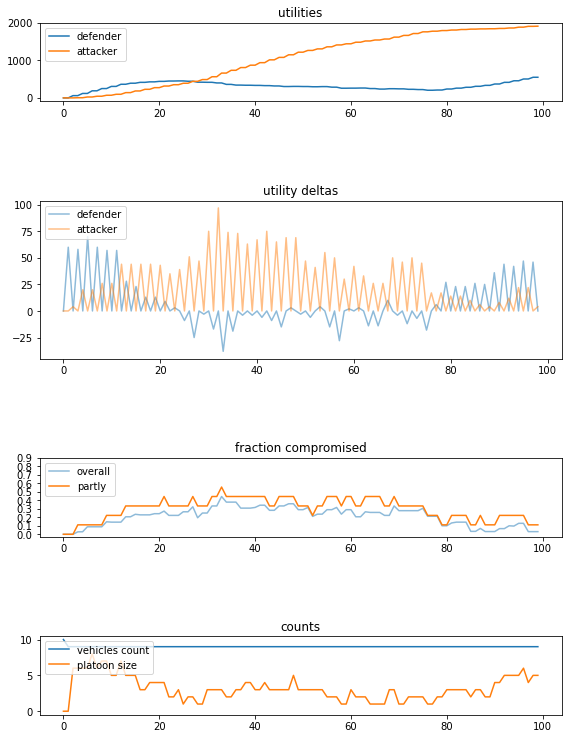

In [14]:

# fig, axs = plt.subplots(4, figsize=(16,9), gridspec_kw={'height_ratios': [1, 2, 1, 1]})
fig, axs = plt.subplots(4, figsize=(8,5), gridspec_kw={'height_ratios': [1, 2, 1, 1]})
i=0
axs[i].plot(dutils, label="defender")
axs[i].plot(autils, label="attacker")
axs[i].legend(loc="upper left")
axs[i].title.set_text("utilities")

i+=1
axs[i].plot(np.diff(dutils), label="defender", alpha=0.5)
axs[i].plot(np.diff(autils), label="attacker", alpha=0.5)
axs[i].legend(loc="upper left")
axs[i].title.set_text("utility deltas")

i+=1
axs[i].plot(compromisePctOverall, label="overall", alpha=0.5)
axs[i].plot(compromisePctPart, label="partly", alpha=1)
axs[i].set_yticks(np.arange(0,1,0.1))
axs[i].title.set_text("fraction compromised")
axs[i].legend(loc="upper left")

i+=1
axs[i].plot(vcount,label="vehicles count")
axs[i].plot(pcount,label="platoon size")
axs[i].legend(loc="upper left")
axs[i].title.set_text("counts")

plt.tight_layout()
plt.subplots_adjust(top=2)